In [1]:
import scvelo as scv
import scanpy as sc
import pickle as pickle
from eval_utils import cross_boundary_correctness, inner_cluster_coh
import pandas as pd
import numpy as np
from os.path import exists
import matplotlib.pyplot as plt
import time
import unitvelo as utv
method = 'scVelo_stochastic'

(Running UniTVelo 0.2.5.2)
2024-03-03 13:47:10


2024-03-03 13:47:22.470002: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-03 13:47:22.470115: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-03 13:47:22.793160: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
datasets = ['MouseErythroid', 'Pancreas_with_cc', 'HumanDevelopingBrain', 'HumanBoneMarrow', 'MouseBoneMarrow',  'DentateGyrus']
data_dir = '/nfs/team283/aa16/data/fate_benchmarking/benchmarking_datasets/'
save_dir = '/nfs/team283/aa16/data/fate_benchmarking/benchmarking_results_revision/'

MouseErythroid
Filtered out 47456 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 3000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:51) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:03) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing neighbors
    finished (0:00:03) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing velocity graph (using 1/256 cores)


  0%|          | 0/9815 [00:00<?, ?cells/s]

    finished (0:00:12) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
# Cross-Boundary Direction Correctness (A->B)
{('Blood progenitors 1', 'Blood progenitors 2'): 0.43631702629119684, ('Blood progenitors 2', 'Erythroid1'): 0.2231883932894119, ('Erythroid1', 'Erythroid2'): 0.2469490392193904, ('Erythroid2', 'Erythroid3'): -0.49422239018377856}
Total Mean: 0.10305801715405513
# In-cluster Coherence
{'Blood progenitors 1': 0.8051472, 'Blood progenitors 2': 0.7266074, 'Erythroid1': 0.6777957, 'Erythroid2': 0.684948, 'Erythroid3': 0.8374029}
Total Mean: 0.7463802099227905
Pancreas_with_cc
Filtered out 20801 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 3000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:02) --> added 
    'distances' and 'connectiv

  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:08) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
# Cross-Boundary Direction Correctness (A->B)
{('Ngn3 high EP', 'Pre-endocrine'): 0.7550942623334588, ('Pre-endocrine', 'Alpha'): 0.7407024896714568, ('Pre-endocrine', 'Beta'): 0.8245279267596797, ('Pre-endocrine', 'Delta'): 0.5213765171377965, ('Pre-endocrine', 'Epsilon'): -0.050435227338359416}
Total Mean: 0.5582531937128065
# In-cluster Coherence
{'Alpha': 0.7423561, 'Beta': 0.74370146, 'Delta': 0.7973447, 'Ductal': 0.96996146, 'Epsilon': 0.8494918, 'Ngn3 high EP': 0.9539899, 'Ngn3 low EP': 0.97469455, 'Pre-endocrine': 0.8208246}
Total Mean: 0.8565455675125122
HumanDevelopingBrain
Filtered out 17336 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 3000 highly variable genes.
computing neighbors
    finished 

  0%|          | 0/9443 [00:00<?, ?cells/s]

    finished (0:00:14) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
# Cross-Boundary Direction Correctness (A->B)
{('Radial Glia', 'Intermediate \n Progenitor'): 0.17374040635209398, ('Intermediate \n Progenitor', 'Newborn \n Excitatory Neuron'): 0.20574984774771718, ('Newborn \n Excitatory Neuron', 'Immature \n Excitatory Neuron'): -0.07686081169601755, ('Immature \n Excitatory Neuron', 'Mature \n Excitatory Neuron'): -0.49636032559984794}
Total Mean: -0.048432720799013576
# In-cluster Coherence
{'Immature \n Excitatory Neuron': 0.7528147, 'Intermediate \n Progenitor': 0.8138593, 'Mature \n Excitatory Neuron': 0.76348907, 'Newborn \n Excitatory Neuron': 0.8205157, 'Radial Glia': 0.8316726}
Total Mean: 0.7964702844619751
HumanBoneMarrow
Filtered out 7837 genes that are detected 20 counts (shared).
Normalized count data: X, spli

  0%|          | 0/5780 [00:00<?, ?cells/s]

    finished (0:00:09) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
# Cross-Boundary Direction Correctness (A->B)
{('HSC_1', 'Ery_1'): -0.8567770249498788, ('HSC_1', 'HSC_2'): -0.6839703621960471, ('Ery_1', 'Ery_2'): -0.8867338507641281}
Total Mean: -0.8091604126366847
# In-cluster Coherence
{'CLP': 0.7796582, 'DCs': 0.9264843, 'Ery_1': 0.9244898, 'Ery_2': 0.9624583, 'HSC_1': 0.77700275, 'HSC_2': 0.8506332, 'Mega': 0.93734056, 'Mono_1': 0.8964676, 'Mono_2': 0.911336, 'Precursors': 0.8951092}
Total Mean: 0.8860980272293091
MouseBoneMarrow
Filtered out 20300 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted a

  0%|          | 0/2600 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
# Cross-Boundary Direction Correctness (A->B)
{('dividing', 'progenitors'): 0.48456976707837013, ('progenitors', 'activating'): 0.7635954477569498}
Total Mean: 0.62408260741766
# In-cluster Coherence
{'B cell lineage': 0.79661745, 'activating': 0.6962978, 'dividing': 0.7058143, 'macrophages': 0.7079883, 'progenitors': 0.6767614}
Total Mean: 0.7166958451271057
DentateGyrus
Filtered out 10340 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 3000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', mome

  0%|          | 0/2930 [00:00<?, ?cells/s]

    finished (0:00:04) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
# Cross-Boundary Direction Correctness (A->B)
{('nIPC', 'Neuroblast'): 0.9003700978448941, ('Neuroblast', 'Granule immature'): 0.5874964616042331, ('Granule immature', 'Granule mature'): 0.021745784147293192, ('Radial Glia-like', 'Astrocytes'): 0.8546097794891175, ('OPC', 'OL'): -0.8340557358064447}
Total Mean: 0.30603327745581865
# In-cluster Coherence
{'Astrocytes': 0.85087585, 'Cajal Retzius': 0.9856573, 'Cck-Tox': 0.9375297, 'Endothelial': 0.9448638, 'GABA': 0.91082203, 'Granule immature': 0.83902425, 'Granule mature': 0.7975912, 'Microglia': 0.97058135, 'Mossy': 0.90160036, 'Neuroblast': 0.92450315, 'OL': 0.9506559, 'OPC': 0.9175724, 'Radial Glia-like': 0.8933756, 'nIPC': 0.9384544}
Total Mean: 0.911650538444519


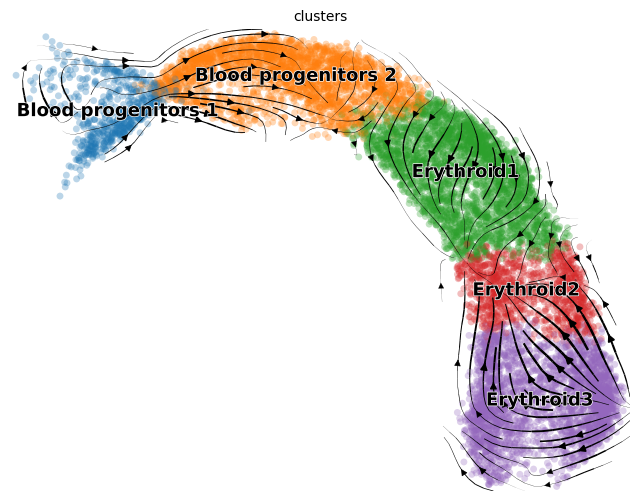

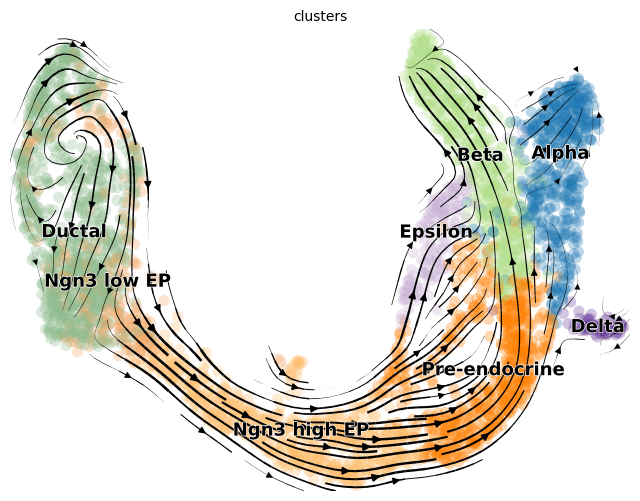

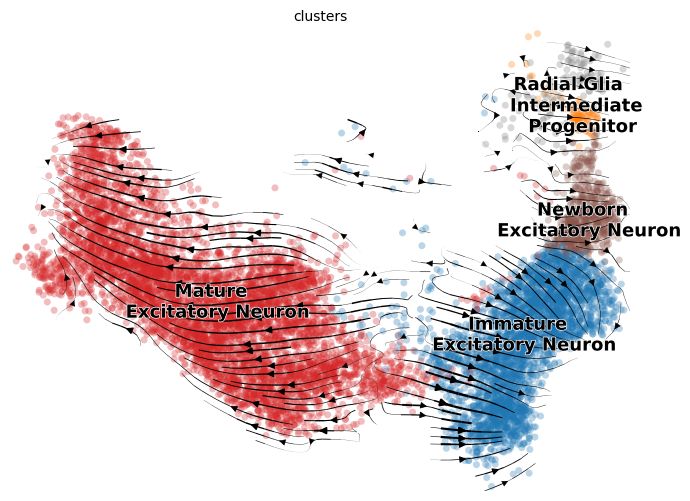

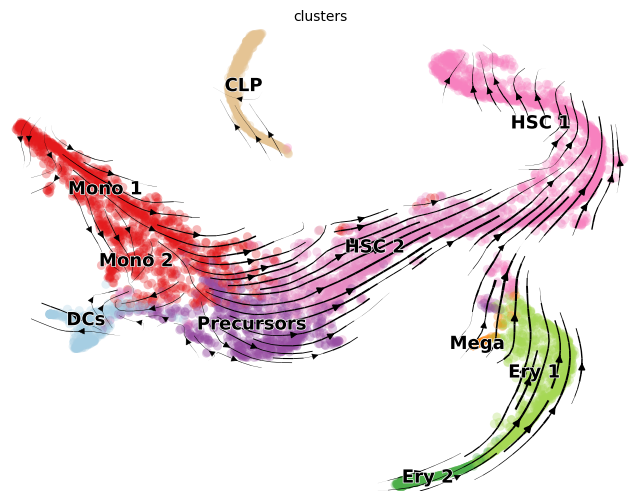

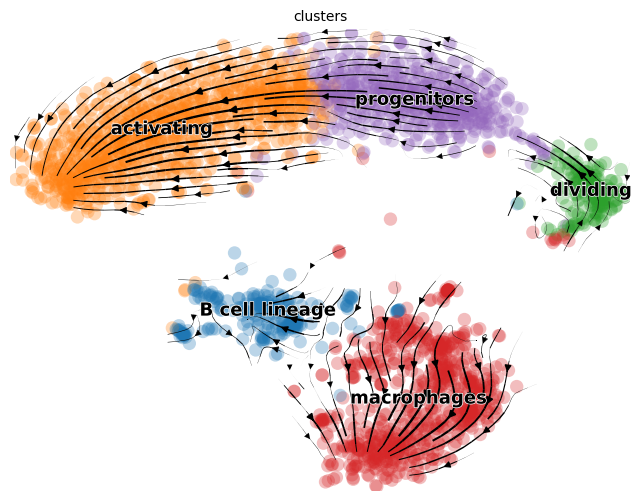

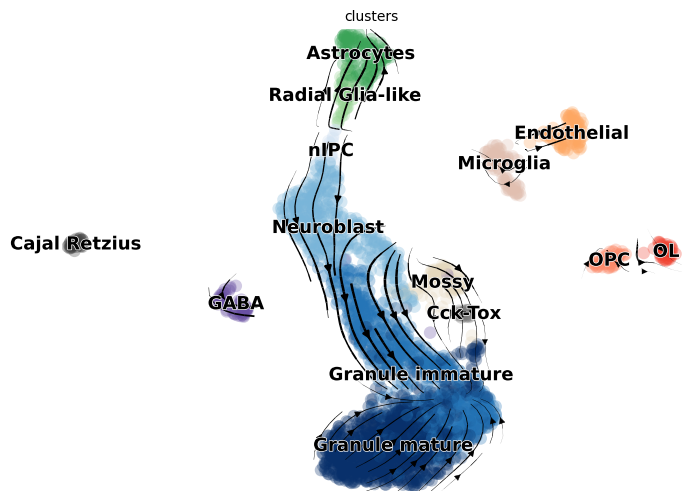

In [3]:
for dataset in datasets:
    print(dataset)
    # Load and setup data:
    adata = sc.read_h5ad(data_dir + dataset + '/' + dataset + '_anndata.h5ad')
    start = time.time()
    scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=3000)
    scv.pp.moments(adata, n_pcs=30, n_neighbors=30)
    scv.tl.velocity(adata, vkey='velocity', mode='stochastic')
    end = time.time()
    scv.pp.neighbors(adata)
    scv.tl.velocity_graph(adata, vkey='velocity')
    scv.tl.velocity_embedding(adata, vkey='velocity')
    fix, ax = plt.subplots(1, 1, figsize = (8, 6))
    scv.pl.velocity_embedding_stream(adata, basis='umap', save = False, vkey='velocity',
                                     show = False, ax = ax, legend_fontsize = 13)
    plt.savefig(save_dir + 'UMAPs/' + dataset + '_UMAP_scvelo.svg')
    # Calculate performance metrics:
    adata.layers['velocity'][pd.isna(adata.layers['velocity'])] = 0
    file = open(data_dir + dataset + '/' + dataset + '_groundTruth.pickle' ,'rb')
    ground_truth = pickle.load(file)
    metrics = utv.evaluate(adata, ground_truth, 'clusters', 'velocity')
    if exists(save_dir + dataset + '_CBDC_scores.csv'):
        tab = pd.read_csv(save_dir + dataset + '_CBDC_scores.csv', index_col = 0)
    else:
        tab = pd.DataFrame(columns = list(metrics['Cross-Boundary Direction Correctness (A->B)'].keys())  + ['Mean', 'Time'],
                 index = [method])
    cb_score = [np.mean(metrics['Cross-Boundary Direction Correctness (A->B)'][x])
                for x in metrics['Cross-Boundary Direction Correctness (A->B)'].keys()]
    tab.loc[method,:] = cb_score + [np.mean(cb_score), end-start]
    tab.to_csv(save_dir + dataset + '_CBDC_scores.csv')
    adata.write_h5ad('/nfs/team283/aa16/data/fate_benchmarking/CellRank/' + method + dataset + 'AnnDataForCellRank.h5ad')